In [13]:
import numpy as np
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.ext.matproj import MPRester
from pymatgen.analysis.diffraction.xrd import *

In [14]:
mp_key = "jkj1S0TLmQtlvQmGDoUQvq5XQzLfKlCF"
mp_id = "mp-14437"

In [15]:

with MPRester(mp_key) as m:
    prim_struc = m.get_structure_by_material_id(mp_id)
    

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Un rayonnement X est diffusé par les électrons d’un atome. Le
facteur de forme de l’atome f est défini comme le rapport
entre l’amplitude diffusée par l’atome et celle diffusée par un
électron. Il est fonction de l’angle 2θ que font entre elles les
directions d’incidence et d’observation et est proportionnel au
nombre d’électrons Z.
observation
- Pour 2θ = 0:
les électrons diffusent en phase et
f (θ) = Z
- Pour 2θ ≠ 0:
il y a des déphasages et f (θ) < Z0 1
Diffusion de Thomson (cohérente) par un atome
Vitesse de déplacement des e- très grande
devant oscillation du champ électrique
Les RX ne "voient" qu’un nuage
électronique moyen
! Déphasage entre les ondes
diffusées par chaque e.
L'intensité des pics de diffraction peut être trouvé en calculant le maximum de l'intensité diffusée $I= c²SS* $
avec S la somme des ondes diffusée par les J atomes. 
On a alors Imax ~J²

In [16]:
spaceAnalyzer = SpacegroupAnalyzer(prim_struc)
data = spaceAnalyzer.get_conventional_standard_structure()
xrd =XRDCalculator(wavelength = 1.54060)
pattern = xrd.get_pattern(data) 
indices = pattern.hkls


In [17]:
print("premier pic de diffraction")
print("two Theta angle = ", pattern.x[0])
print("Intensité relative au plus haut pic) = ", pattern.y[0])
print("Indices hkl et multiplicité ", indices[0])
print("Distance interplanaire (Å): ", pattern.d_hkls[0])

premier pic de diffraction
two Theta angle =  13.593275101405883
Intensité relative au plus haut pic) =  3.99976132676209
Indices hkl et multiplicité  [{'hkl': (0, 0, 0, 3), 'multiplicity': 2}]
Distance interplanaire (Å):  6.508897507786491


In [18]:
print("deuxième pic de diffraction")
print("two Theta angle = ", pattern.x[1])
print("Intensité relative au plus haut pic) = ", pattern.y[1])
print("Indices hkl et multiplicité ", indices[1])
print("Distance interplanaire (Å): ", pattern.d_hkls[1])

deuxième pic de diffraction
two Theta angle =  27.38269086987226
Intensité relative au plus haut pic) =  37.58274137005287
Indices hkl et multiplicité  [{'hkl': (0, 0, 0, 6), 'multiplicity': 2}]
Distance interplanaire (Å):  3.2544487538932456


In [19]:
print("troisième pic de diffraction")
print("two Theta angle = ", pattern.x[2])
print("Intensité relative au plus haut pic) = ", pattern.y[2])
print("Indices hkl et multiplicité ", indices[2])
print("Distance interplanaire (Å): ", pattern.d_hkls[2])

troisième pic de diffraction
two Theta angle =  29.964807825088396
Intensité relative au plus haut pic) =  0.005446516674742004
Indices hkl et multiplicité  [{'hkl': (1, 0, -1, 1), 'multiplicity': 12}]
Distance interplanaire (Å):  2.9796258912418194


graphe sur les 3 pics


<Axes: xlabel='$2\\theta$ ($^\\circ$)', ylabel='Intensities (scaled)'>

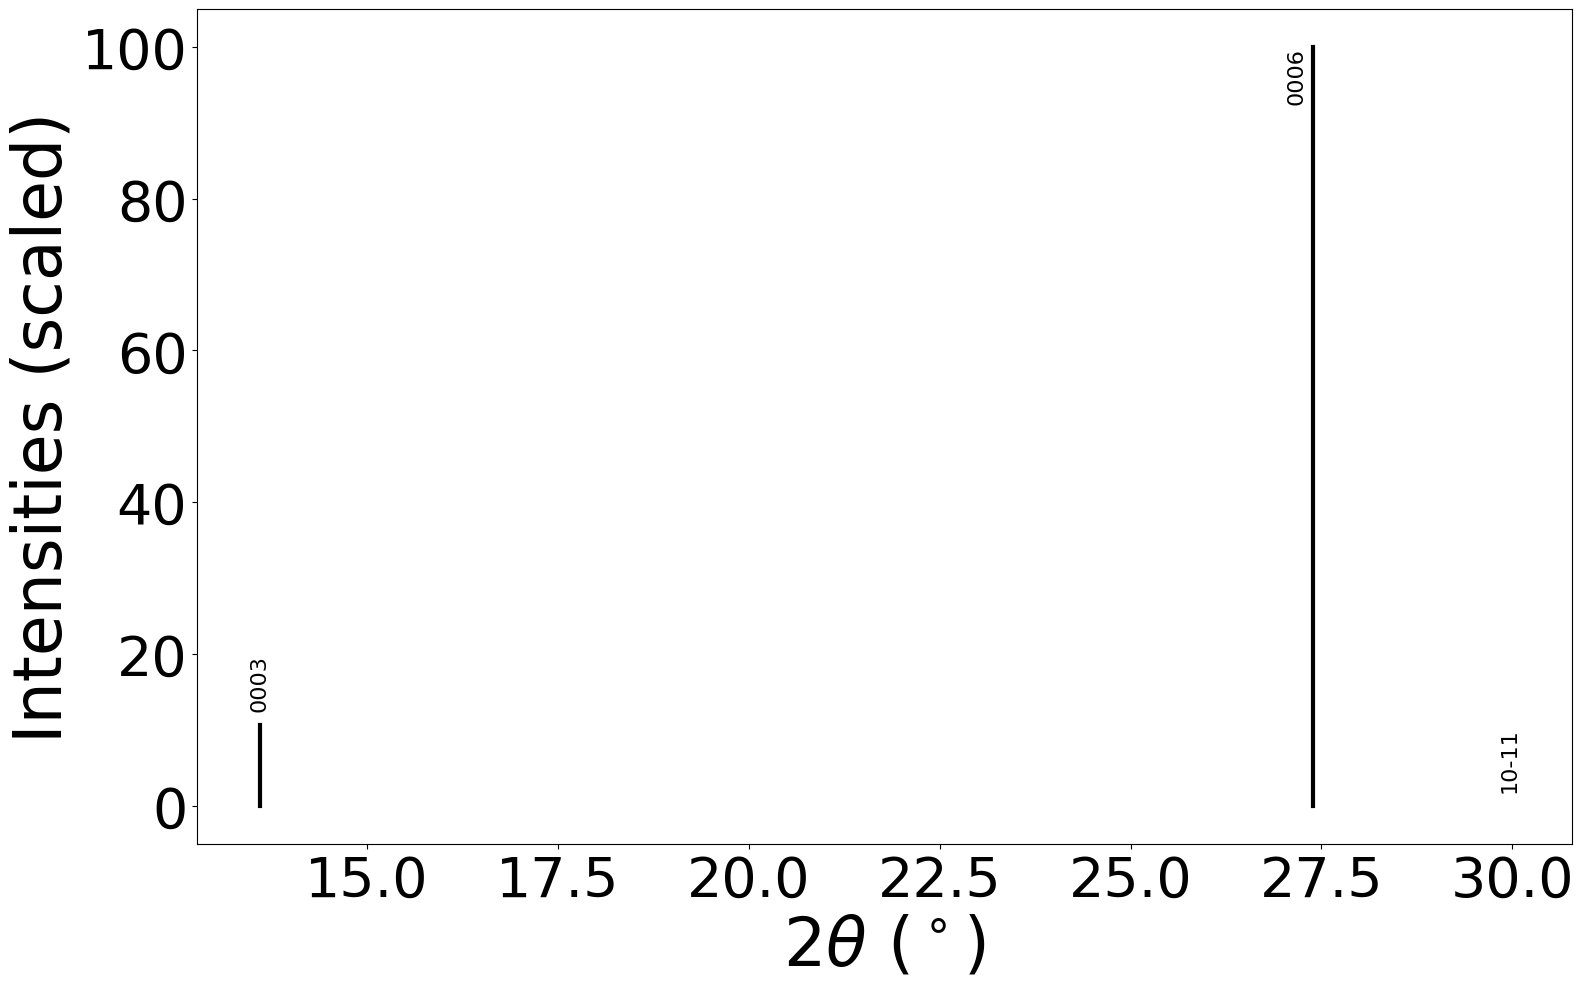

In [20]:
print("graphe sur les 3 pics")
xrd.get_plot(data, two_theta_range=(0,31))